# Analyzing Message Times

Here, we'll see how "busy" each week of the year is by seeing how many messages are sent each week.

First, let's import everything we need.

In [17]:
import sys

import groupmeme
import groupmeme.api as api
import groupmeme.group as group
import json

import pandas as pd
import numpy as np
import cufflinks as cf

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  


## Collect Messages

Here, we college all the messages into a Pandas dataframe. We then reindex that data by the time that each message was sent and evenly space out time intervals to be per day. Finally, we select only messages from 2015 to make the data easier to read.

In [18]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()

selected_group = "SEP Actives" # Change this!!

sep_dict = groups[selected_group]
sep = group.Group(sep_dict["id"])

sep.collect_messages()
sep.handle_messages()

In [19]:
messages = sep.messages
messages["created_at"] = pd.to_datetime(messages["created_at"], unit="s")

new_messages = messages.groupby("created_at").size()
to_plot = new_messages.resample("D", how=np.sum)
to_plot = to_plot[to_plot.index.year == 2015]

## Special Events

Here, we define some special events for this chat, which is a groupchat for a professional fraternity.

Rush is a period of 1-2 weeks where the organizaton recruits new members. 


In [20]:
rush = (pd.datetime(2015, 9, 2),pd.datetime(2015, 9, 9))
summer = (pd.datetime(2015, 5, 20), pd.datetime(2015, 8, 18))
spring = (pd.datetime(2015, 3, 23), pd.datetime(2015, 2, 27))

events = {"rush" : rush, "summer" : summer, "spring break" : spring}

## Let's See It

As we can see, the groupchat is less active during breaks and becomes intensely active during rush when memebers need to coordinate meetings, interviews, etc. 

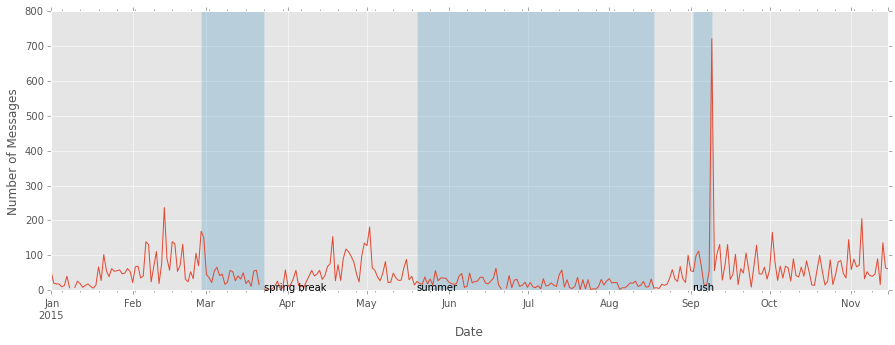

In [21]:
ax = to_plot.plot(figsize=(15,5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Messages")
for event, daterange in events.items():
    plt.axvspan(daterange[0],daterange[1], alpha=0.25)
    plt.annotate(event, 
             xy=(daterange[0], 0.75),  
             xycoords='data',
             arrowprops=dict(arrowstyle="->"))